In [1]:
import pandas as pd

In [2]:
import pprint
pp = pprint.PrettyPrinter(indent=2)

In [3]:
import pymysql.cursors
connection = pymysql.connect(host='127.0.0.1',
                            user='root',
                            password='village11',
                            port=3306,
                            db='savant_db',
                            charset='utf8mb4',
                            cursorclass=pymysql.cursors.DictCursor)

In [4]:
#with connection.cursor() as cursor:
    #sql = "SELECT stand, launch_speed, launch_angle, events FROM `2016 Season` WHERE launch_speed AND events IS NOT NULL UNION SELECT stand, launch_speed, launch_angle, events FROM `2017 Season` WHERE launch_speed AND events IS NOT NULL UNION SELECT stand, launch_speed, launch_angle, events FROM `2018 Season` WHERE launch_speed AND events IS NOT NULL UNION SELECT stand, launch_speed, launch_angle, events FROM `2019 Season` WHERE launch_speed AND events IS NOT NULL"
    #cursor.execute(sql)
    #combined_data = cursor.fetchall()

In [5]:
#combined_data = pd.DataFrame(combined_data)

In [6]:
#combined_data.to_csv('combined_data.csv')

# Left-Handed Batting Training & Testing

In [4]:
with connection.cursor() as cursor:
    sql = "SELECT events, launch_angle, launch_speed, stand FROM savant_db.combined_xba_data WHERE stand = 'L'"
    cursor.execute(sql)
    leftie_df = cursor.fetchall()

In [5]:
leftie_df = pd.DataFrame(leftie_df, index=None)
leftie_df

,events,launch_angle,launch_speed,stand
0,field_out,-5.0,103.0,L
1,field_out,-21.0,82.9,L
2,field_error,-62.0,43.0,L
3,field_out,39.0,89.2,L
4,field_out,29.0,80.2,L
5,field_out,5.0,99.3,L
6,field_out,32.0,98.4,L
7,field_out,29.0,93.6,L
8,field_out,57.0,93.1,L
9,field_out,-6.0,88.3,L


In [6]:
leftie_df.events.unique()

array(['field_out', 'field_error', 'single', 'force_out', 'double',
       'sac_fly', 'home_run', 'grounded_into_double_play', 'hit_by_pitch',
       'triple', 'sac_bunt', 'fielders_choice_out', 'double_play',
       'strikeout', 'fielders_choice', 'sac_fly_double_play',
       'triple_play', 'catcher_interf', 'sac_bunt_double_play', 'walk',
       'pickoff_caught_stealing_2b', 'intent_walk', 'caught_stealing_2b',
       'pickoff_2b', 'pickoff_1b', 'other_out', 'batter_interference',
       'run', 'caught_stealing_home'], dtype=object)

In [7]:
leftie_event_values = []
for left in leftie_df.events:
    if left == 'field_out' or left == 'field_error' or left == 'force_out' or left == 'grounded_into_double_play' or left == 'fielders_choice' or left == 'sac_bunt_double_play' or left == 'triple_play' or left == 'strikeout' or left == 'sac_bunt_double_play' or left == 'other_out':
        leftie_event_values.append(0)
    else:
        leftie_event_values.append(1)

In [8]:
leftie_event_values

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,


In [9]:
leftie_event_values = pd.DataFrame(leftie_event_values)
leftie_event_values = leftie_event_values.rename(index = int, columns = {0:"event_values"})
leftie_event_values

,event_values
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [10]:
leftie_df = leftie_df.join(leftie_event_values)
leftie_df

,events,launch_angle,launch_speed,stand,event_values
0,field_out,-5.0,103.0,L,0
1,field_out,-21.0,82.9,L,0
2,field_error,-62.0,43.0,L,0
3,field_out,39.0,89.2,L,0
4,field_out,29.0,80.2,L,0
5,field_out,5.0,99.3,L,0
6,field_out,32.0,98.4,L,0
7,field_out,29.0,93.6,L,0
8,field_out,57.0,93.1,L,0
9,field_out,-6.0,88.3,L,0


# Deep Learning Model (Leftie)

In [11]:
X_left = leftie_df.drop(["events", "stand", "event_values"], axis=1)

In [12]:
leftie_target = leftie_df["event_values"]
target_names = ["hit", "out"]

In [13]:
leftie_data = leftie_df.drop(["events", "stand", "event_values"], axis=1)
feature_names = leftie_data.columns
leftie_data.head()

,launch_angle,launch_speed
0,-5.0,103.0
1,-21.0,82.9
2,-62.0,43.0
3,39.0,89.2
4,29.0,80.2


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(leftie_data, leftie_target, random_state=42)

# Trees

In [15]:
from sklearn import tree

In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5661081052686873

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/anaconda3/envs/pythondata/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.6077638283342963

In [18]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.597745940059912, 'launch_speed'), (0.4022540599400879, 'launch_angle')]

# KNN

In [19]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

k: 1, Train/Test Score: 0.817/0.568
k: 3, Train/Test Score: 0.788/0.648
k: 5, Train/Test Score: 0.770/0.682
k: 7, Train/Test Score: 0.762/0.702
k: 9, Train/Test Score: 0.759/0.711
k: 11, Train/Test Score: 0.757/0.718
k: 13, Train/Test Score: 0.756/0.723
k: 15, Train/Test Score: 0.754/0.727
k: 17, Train/Test Score: 0.753/0.729
k: 19, Train/Test Score: 0.752/0.732
k: 21, Train/Test Score: 0.751/0.734
k: 23, Train/Test Score: 0.751/0.734
k: 25, Train/Test Score: 0.750/0.736
k: 27, Train/Test Score: 0.750/0.737
k: 29, Train/Test Score: 0.750/0.736
k: 31, Train/Test Score: 0.749/0.737
k: 33, Train/Test Score: 0.749/0.739
k: 35, Train/Test Score: 0.749/0.739
k: 37, Train/Test Score: 0.749/0.740
k: 39, Train/Test Score: 0.748/0.740
k: 41, Train/Test Score: 0.749/0.740
k: 43, Train/Test Score: 0.748/0.741
k: 45, Train/Test Score: 0.748/0.742
k: 47, Train/Test Score: 0.748/0.742
k: 49, Train/Test Score: 0.748/0.741


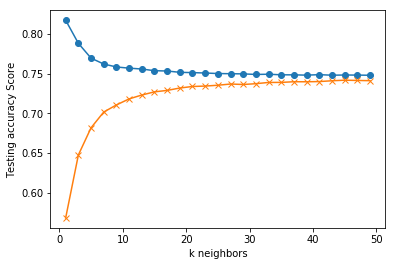

In [20]:
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(X_train, y_train)
print('k=49 Test Acc: %.3f' % knn.score(X_test, y_test))

k=49 Test Acc: 0.741


# Right-Handed Batting Training & Testing

In [22]:
with connection.cursor() as cursor:
    sql = "SELECT events, launch_angle, launch_speed, stand FROM savant_db.combined_xba_data WHERE stand = 'R'"
    cursor.execute(sql)
    rightie_df = cursor.fetchall()

In [23]:
rightie_df = pd.DataFrame(rightie_df)
rightie_df.head()

,events,launch_angle,launch_speed,stand
0,single,10.0,106.8,R
1,field_out,-21.0,82.9,R
2,field_out,15.0,109.2,R
3,field_out,22.0,86.9,R
4,field_out,-49.0,70.9,R


In [24]:
rightie_event_values = []
for right in rightie_df.events:
    if right == 'field_out' or right == 'field_error' or right == 'force_out' or right == 'grounded_into_double_play' or right == 'fielders_choice' or right == 'sac_bunt_double_play' or right == 'triple_play' or right == 'strikeout' or right == 'sac_bunt_double_play' or right == 'other_out':
        rightie_event_values.append(0)
    else:
        rightie_event_values.append(1)

In [25]:
rightie_event_values = pd.DataFrame(rightie_event_values)
rightie_event_values = rightie_event_values.rename(index = int, columns = {0:"event_values"})
rightie_event_values

,event_values
0,1
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,0
9,1


In [26]:
rightie_df = rightie_df.join(rightie_event_values)
rightie_df.head()

,events,launch_angle,launch_speed,stand,event_values
0,single,10.0,106.8,R,1
1,field_out,-21.0,82.9,R,0
2,field_out,15.0,109.2,R,0
3,field_out,22.0,86.9,R,0
4,field_out,-49.0,70.9,R,0


In [27]:
rightie_data = rightie_df.drop(["events", "stand", "event_values"], axis=1)
right_feature_names = rightie_data.columns
rightie_data

,launch_angle,launch_speed
0,10.0,106.8
1,-21.0,82.9
2,15.0,109.2
3,22.0,86.9
4,-49.0,70.9
5,18.0,75.7
6,12.0,81.7
7,-57.0,56.8
8,-21.0,82.9
9,12.0,112.8


In [28]:
rightie_target = rightie_df["event_values"]
right_target_names = ["hit", "out"]

# Deep Learning Model (Rightie)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rightie_data, rightie_target, random_state=42)

In [30]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5672983083929733

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5979993493819128

In [32]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)
#right-handed batters have slightly higher launch_angle. Might be because they are farther from first base

[(0.608235054195983, 'launch_speed'), (0.3917649458040166, 'launch_angle')]

# Combined Data

In [33]:
combined_data = pd.read_csv('combined_data.csv')
combined_data = pd.DataFrame(combined_data)
combined_data = combined_data[['events', 'launch_angle', 'launch_speed', 'stand']]
combined_data

,events,launch_angle,launch_speed,stand
0,field_out,-5.0,103.0,L
1,single,10.0,106.8,R
2,field_out,-21.0,82.9,L
3,field_out,-21.0,82.9,R
4,field_out,15.0,109.2,R
5,field_out,22.0,86.9,R
6,field_error,-62.0,43.0,L
7,field_out,-49.0,70.9,R
8,single,18.0,75.7,R
9,single,12.0,81.7,R


In [34]:
total_event_values = []
for total in combined_data.events:
    if total == 'field_out' or total == 'field_error' or total == 'force_out' or total == 'grounded_into_double_play' or total == 'fielders_choice' or total == 'sac_bunt_double_play' or total == 'triple_play' or total == 'strikeout' or total == 'sac_bunt_double_play' or total == 'other_out':
        total_event_values.append(0)
    else:
        total_event_values.append(1)

In [35]:
total_event_values = pd.DataFrame(total_event_values)
total_event_values = total_event_values.rename(index = int, columns = {0:"event_values"})
total_event_values

,event_values
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [36]:
combined_data = combined_data.join(total_event_values)
combined_data

,events,launch_angle,launch_speed,stand,event_values
0,field_out,-5.0,103.0,L,0
1,single,10.0,106.8,R,1
2,field_out,-21.0,82.9,L,0
3,field_out,-21.0,82.9,R,0
4,field_out,15.0,109.2,R,0
5,field_out,22.0,86.9,R,0
6,field_error,-62.0,43.0,L,0
7,field_out,-49.0,70.9,R,0
8,single,18.0,75.7,R,1
9,single,12.0,81.7,R,1


# Deep Learning Neural Network

In [37]:
X = combined_data.drop(["events", "stand", "event_values"], axis=1)
y = combined_data["event_values"]
print(X.shape, y.shape)

(174515, 2) (174515,)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from tensorflow.keras.utils import to_categorical

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [40]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [42]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [43]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=2))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [46]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 10,602
Trainable params: 10,602
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/60
 - 21s - loss: 0.5611 - acc: 0.7131
Epoch 2/60
 - 19s - loss: 0.5405 - acc: 0.7277
Epoch 3/60
 - 19s - loss: 0.5367 - acc: 0.7316
Epoch 4/60
 - 19s - loss: 0.5341 - acc: 0.7342
Epoch 5/60
 - 19s - loss: 0.5329 - acc: 0.7348
Epoch 6/60
 - 19s - loss: 0.5313 - acc: 0.7364
Epoch 7/60
 - 19s - loss: 0.5306 - acc: 0.7367
Epoch 8/60
 - 19s - loss: 0.5297 - acc: 0.7378
Epoch 9/60
 - 19s - loss: 0.5294 - acc: 0.7371
Epoch 10/60
 - 20s - loss: 0.5290 - acc: 0.7380
Epoch 11/60
 - 19s - loss: 0.5282 - acc: 0.7384
Epoch 12/60
 - 19s - loss: 0.5280 - acc: 0.7382
Epoch 13/60
 - 19s - loss: 0.5277 - acc: 0.7390
Epoch 14/60
 - 19s - loss: 0.5271 - acc: 0.7390
Epoch 15/60
 - 19s - loss: 0.5270 - acc: 0.7392
Epoch 16/60
 - 19s - loss: 0.5267 - acc: 0.7385
Epoch 17/60
 - 19s - loss: 0.5264 - acc: 0.7392
Epoch 18/60
 - 19s - loss: 0.5263 - acc: 0.7392
Epoch 19/60
 - 19s - loss: 0.5260 - acc: 0.7399
Epoch 20/60
 - 19s - loss: 0.5257 - acc: 0.7399
E

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [ ]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

In [55]:
X = combined_data.launch_angle.values.reshape(-1, 1)
y = combined_data.launch_speed.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (174515, 1) (174515, 1)


array([[ -5.],
       [ 10.],
       [-21.],
       ...,
       [ 50.],
       [ 14.],
       [-13.]])

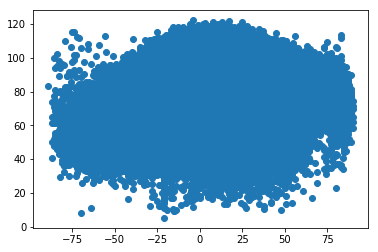

In [56]:
plt.scatter(X, y)
#This is what all batted balls look like

In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [58]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 
#obviously no correlation

Weight coefficients:  [[0.11250411]]
y-axis intercept:  [83.24723784]


# Linear Regression on Batted Balls Recorded as Hits

In [49]:
with connection.cursor() as cursor:
    sql = "SELECT events, launch_angle, launch_speed, stand FROM savant_db.combined_xba_data WHERE events NOT IN ('field_out', 'force_out', 'grounded_into_double_play', 'fielders_choice_out', 'strikeout', 'sac_fly_double_play', 'triple_play', 'sac_bunt_double_play', 'other_out', 'batter_interference', 'field_error', 'sac_fly', 'sac_bunt')"
    cursor.execute(sql)
    sh_df = cursor.fetchall()

In [50]:
sh_df = pd.DataFrame(sh_df)
sh_df

,events,launch_angle,launch_speed,stand
0,single,10.0,106.8,R
1,single,18.0,75.7,R
2,single,12.0,81.7,R
3,single,-57.0,56.8,R
4,single,12.0,112.8,R
5,single,5.0,108.5,R
6,home_run,32.0,104.4,R
7,double,3.0,89.5,R
8,single,16.0,86.0,R
9,home_run,34.0,97.9,R


In [51]:
X_sh = sh_df.launch_angle.values.reshape(-1, 1)
y_sh = sh_df.launch_speed.values.reshape(-1, 1)

print("Shape: ", X_sh.shape, y_sh.shape)
X_sh

Shape:  (59568, 1) (59568, 1)


array([[ 10.],
       [ 18.],
       [ 12.],
       ...,
       [  1.],
       [ 28.],
       [-13.]])

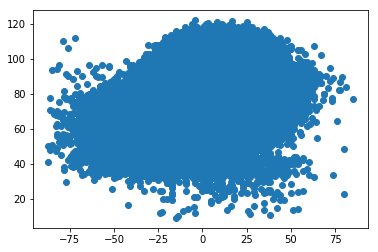

In [52]:
plt.scatter(X_sh, y_sh)

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_sh,y_sh)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [54]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 
#slightly higher coefficient

Weight coefficients:  [[0.15314412]]
y-axis intercept:  [87.54648819]


In [56]:
import numpy as np

In [57]:
x_min = np.array([[X_sh.min()]])
x_max = np.array([[X_sh.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[-87.]]
Max X Value: [[85.]]


In [58]:
predictions = model.predict(X_sh)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 0
Predicted output: [89.07792943]
Prediction Error: [89.07792943]


In [59]:
x_min = X_sh.min()
x_max = X_sh.max()

In [60]:
y_min_actual = y_sh.min()
y_max_actual = y_sh.max()

In [61]:
y_min = 87.54648819 + .15314412 * x_min
y_max = 87.54648819 + .15314412 * x_max

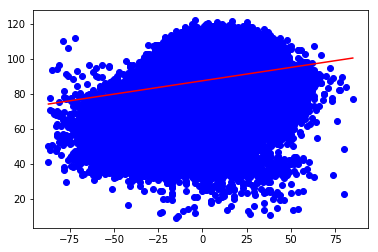

In [62]:
plt.scatter(X_sh, y_sh, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [ ]:
#If you hit along the line

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
X = combined_data.drop(["events", "stand", "event_values"], axis=1)
y = combined_data["event_values"]

In [65]:
model = LogisticRegression()

In [66]:
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
Xnew = [[25, 100]]

In [76]:
ynew = model.predict_proba(Xnew)

In [77]:
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[25, 100], Predicted=[0.52027952 0.47972048]


In [78]:
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[25, 100], Predicted=0


In [ ]:
#based on the dataset we have exit velocity is weighted more on 